# What is Support Vector Machine ??

Definition from medium:
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.


In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the optimal hyper-plane that differentiate the two classes very well.

# OPTIMAL HYPERPLANE

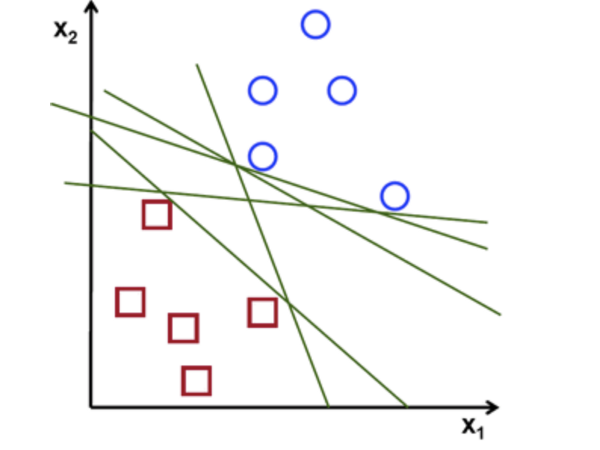In the graph, there clearly exists two classes. One class is                                                       represented with blue circles and another class with red squares. Now                                                we have to find a line that seperates the two classes. As you can see                                                there as many lines that seperates the two classes, so what is the                                                 optimal line in this case?


A line is bad if it passes too close to the points because it will be noise sensitive and it will not generalize correctly. Therefore, our goal should be to find the line passing as far as possible from all points .

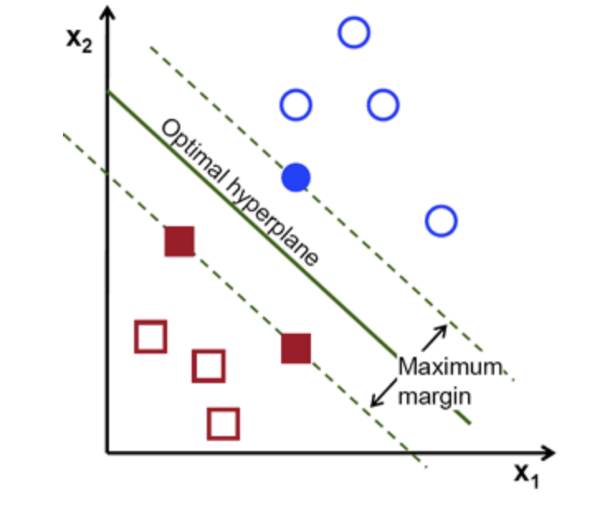


The operation of the SVM algorithm is based on finding the hyperplane that gives the largest minimum distance to the training examples. Twice, this distance receives the important name of margin within SVM’s theory. Therefore, the optimal separating hyperplane maximizes the margin of the training data.



Now the task to find the optimal hyperplane is simple in the above case as the data points as linearly seperable. But what if the data points are not linearly seperable? In that case how do we find the optimal hyperplane.




In [1]:
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier
import numpy as np
import matplotlib.pyplot as plt            # To visuvalizing the data

In [3]:
iris_dataset = datasets.load_iris()

In [6]:
print ("Iris data set Description :: ", iris_dataset['DESCR'])

Iris data set Description ::  Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Mis

In [11]:
print("Iris feature data :: \n ", iris_dataset['data'])

Iris feature data :: 
  [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.

In [13]:
print ("Iris target :: ", iris_dataset['target'])


Iris target ::  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:


def visuvalize_sepal_data():
  iris = datasets.load_iris()
  X = iris.data[:, :2]  # we only take the first two features.
  y = iris.target
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title('Sepal Width & Length')
  plt.show()



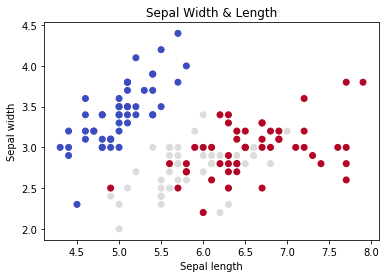

In [16]:
visuvalize_sepal_data()

To visualize the Sepal length, width and corresponding target classes we can create a function with name visuvalize_sepal_data. At the beginning, we are loading the iris dataset to iris variable. Next, we are storing the first 2 features in iris dataset which are sepal length and sepal width to variable x. Then we are storing the corresponding target values in variable y.

As we have seen target variable contains values like 0, 1,2 each value represents the iris flower species type. Then we are plotting the points on XY axis on X-axis we are plotting Sepal Length values. On Y-axis we are plotting Sepal Width values.

# Visualizing the relationship between Petal and target classes

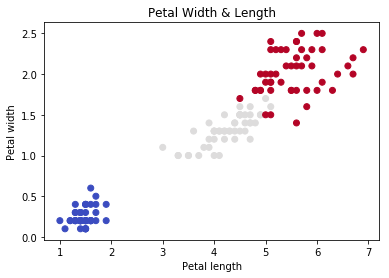

In [17]:
def visuvalize_petal_data():
	iris = datasets.load_iris()
	X = iris.data[:, 2:]  # we only take the last two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Petal length')
	plt.ylabel('Petal width')
	plt.title('Petal Width & Length')
	plt.show()
 
visuvalize_petal_data()

credits:http://dataaspirant.com/2017/01/25/svm-classifier-implemenation-python-scikit-learn/

credits:https://medium.com/coinmonks/support-vector-machines-svm-b2b433419d73